In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/clean/imdb_clean.csv").sort_values("GrossRevenue", ascending=False)[:1000]

## FOR ALL THE CHARTS, I CAN INCREASE THE LABEL FONT SIZE

[Text(0.5, 0, 'Title'),
 Text(0, 0.5, 'Domestic Gross Revenue (in Millions of $)')]

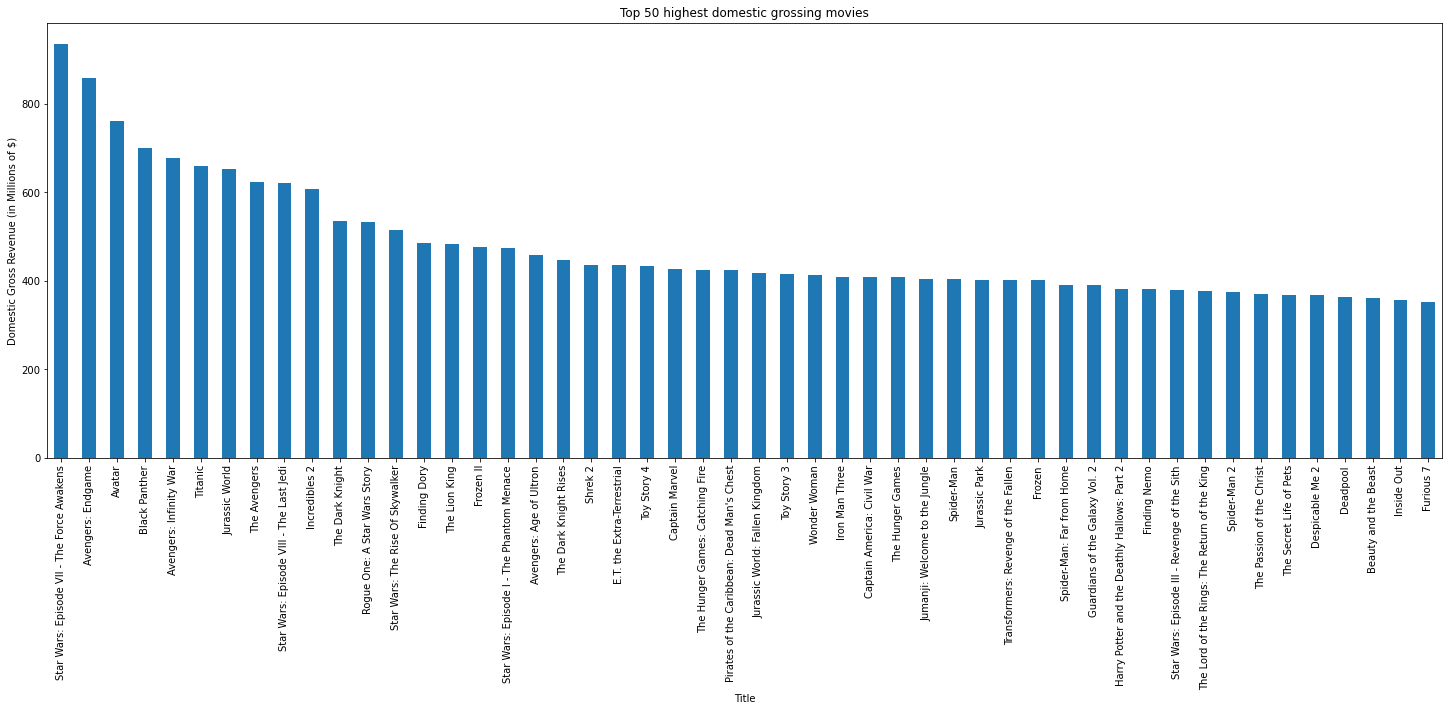

In [3]:
# Show the top 50 movies and explain they are not accounted for inflation and are on domestic revenue terms only

plot1 = (
    df.groupby("Title")["GrossRevenue"]
    .mean()
    .sort_values(ascending=False)[:50]
    .plot.bar(figsize=(25, 8), title="Top 50 highest domestic grossing movies")
)
plot1.set(xlabel="Title", ylabel="Domestic Gross Revenue (in Millions of $)")

     Unnamed: 0       coef  std err      t  P>|t|    [0.025    0.975]
0         const -3100.0094  349.873 -8.860  0.000 -3786.310 -2413.708
1    IMDBRating    28.4566    3.673  7.748  0.000    21.252    35.661
2     Metascore     0.4311    0.193  2.237  0.025     0.053     0.809
3   ReleaseYear     1.5212    0.173  8.775  0.000     1.181     1.861
4        Action    -6.0236    6.556 -0.919  0.358   -18.884     6.836
5     Adventure    31.2174    6.721  4.645  0.000    18.034    44.401
6     Animation   -13.4983    8.706 -1.551  0.121   -30.575     3.579
7     Biography   -63.0474    8.532 -7.390  0.000   -79.783   -46.312
8        Comedy   -22.1018    7.129 -3.100  0.002   -36.086    -8.118
9         Crime   -29.9419    7.019 -4.266  0.000   -43.711   -16.173
10        Drama   -37.1945    6.707 -5.545  0.000   -50.351   -24.038
11       Family   -15.0651    8.755 -1.721  0.086   -32.239     2.108
12      Fantasy    22.7586    8.314  2.737  0.006     6.449    39.068
13      History   -3

[Text(0.5, 0, 'Release Year'),
 Text(0, 0.5, 'Domestic Gross Revenue (in Millions of $)'),
 Text(0.5, 1.0, 'Relation between release year and domestic revenue')]

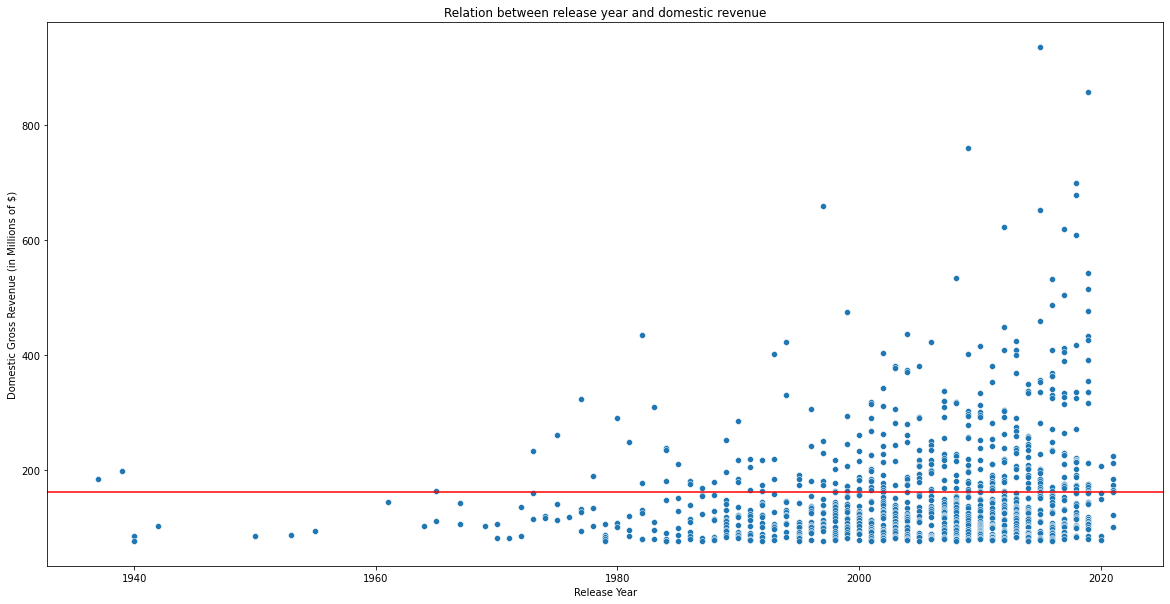

In [4]:
# What makes them a lot of money? Is it the Year, the ratings or the genre? 
# (Show regression "imdb_ols_regression.csv" - maybe I'll put it in here")
# Start showing relationship between Average Revenue and Release Year
# The lines divide the graph into four quadrants, anything above the horizontal line are movies done better than the average
# I can also put one for Release Year if needed

reg1 = pd.read_csv("../quantitative analysis/revenue_ols_regression.csv")
print(reg1)

plt.figure(figsize=(20, 10))
plot2 = sns.scatterplot(data=df, x="ReleaseYear", y="GrossRevenue")
plot2.axhline(np.mean(df["GrossRevenue"]), color="red")
plot2.set(xlabel="Release Year", ylabel="Domestic Gross Revenue (in Millions of $)",
         title="Relation between release year and domestic revenue")

[Text(0.5, 0, 'IMDB Rating'),
 Text(0, 0.5, 'Domestic Gross Revenue (in Millions of $)'),
 Text(0.5, 1.0, 'Relation between IMDB rating and domestic revenue')]

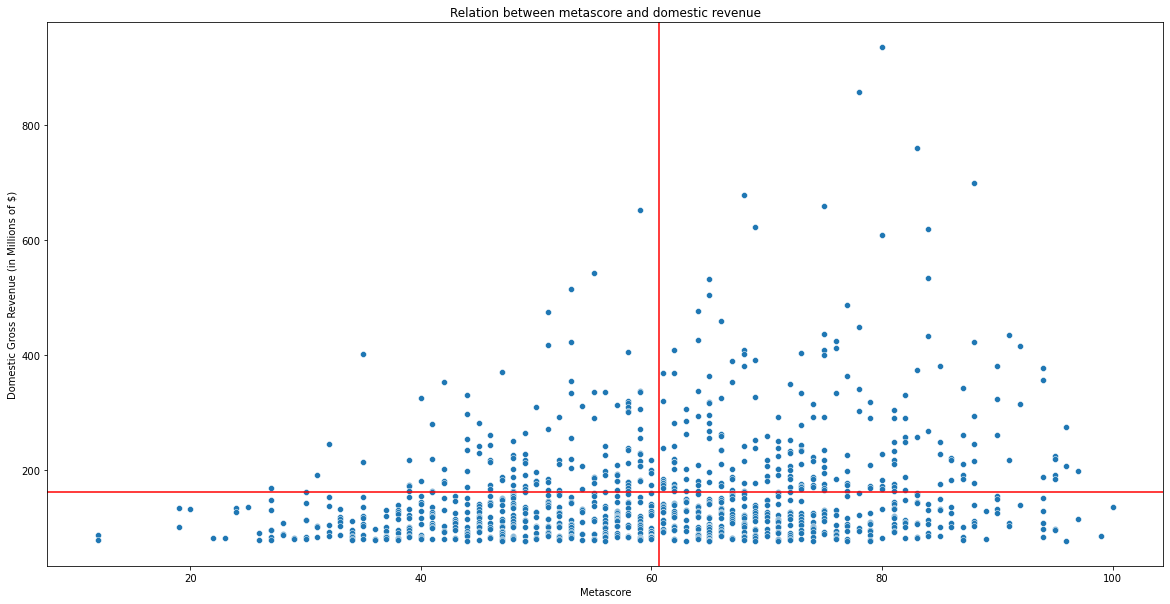

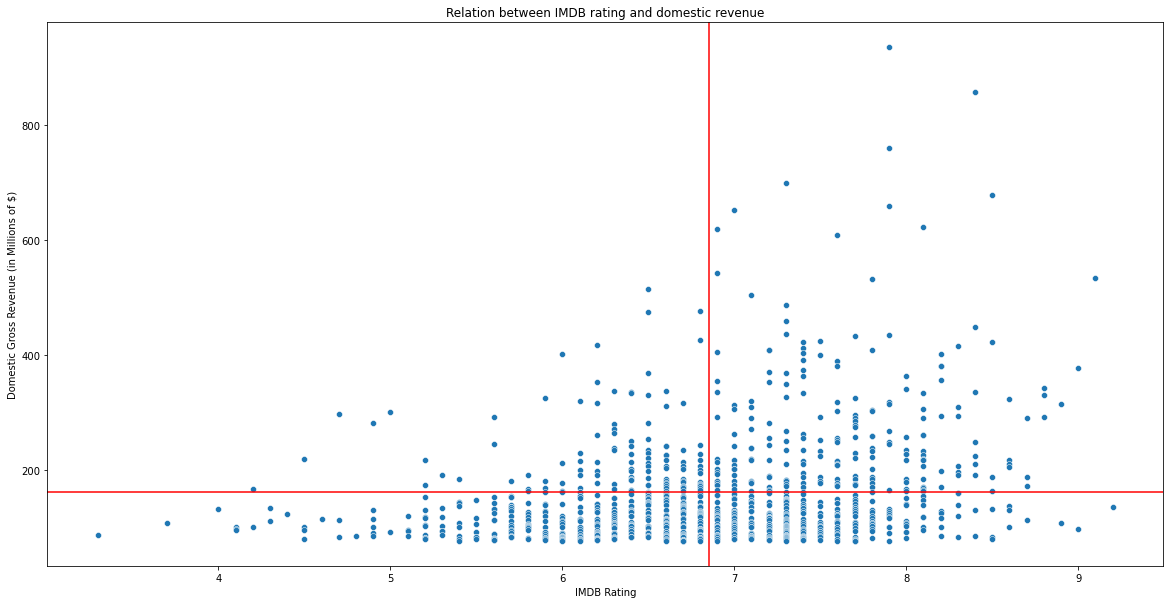

In [5]:
# Show relation with Metascore and revenue. (can remove lines if you want)


plt.figure(figsize=(20, 10))
plot3 = sns.scatterplot(data=df, x="Metascore", y="GrossRevenue")
plot3.axhline(np.mean(df["GrossRevenue"]), color="red")
plot3.axvline(np.mean(df["Metascore"]), color="red")
plot3.set(xlabel="Metascore", ylabel="Domestic Gross Revenue (in Millions of $)",
         title="Relation between metascore and domestic revenue")


# Show relation with IMDB score and revenue. (can remove lines if you want)


plt.figure(figsize=(20, 10))
plot4 = sns.scatterplot(data=df, x="IMDBRating", y="GrossRevenue")
plot4.axhline(np.mean(df["GrossRevenue"]), color="red")
plot4.axvline(np.mean(df["IMDBRating"]), color="red")
plot4.set(xlabel="IMDB Rating", ylabel="Domestic Gross Revenue (in Millions of $)",
         title="Relation between IMDB rating and domestic revenue")

[Text(0.5, 0, 'IMDB Rating'),
 Text(0, 0.5, 'Metascore'),
 Text(0.5, 1.0, 'Relation between IMDB rating and metascore')]

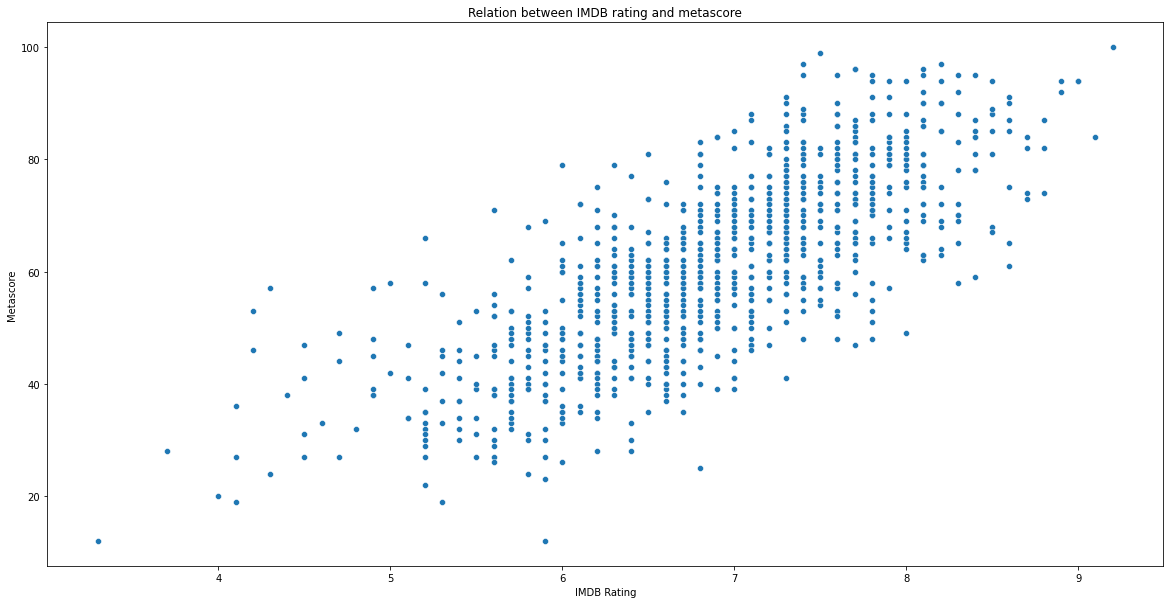

In [6]:
# If we leave both we need to argue that they are very closely related, but the regressions shows they are both significant.
# That could be, because Metascore is done by certified critics, while IMDB doesn't require more than a simple account
# Show the regression "imdb_ols_regression.csv" again 

# Can remove this chart if too long
plt.figure(figsize=(20, 10))
plot5 = sns.scatterplot(data=df, x="IMDBRating", y="Metascore")
plot5.set(xlabel="IMDB Rating", ylabel="Metascore",
         title="Relation between IMDB rating and metascore")

     Unnamed: 0       coef  std err      t  P>|t|    [0.025    0.975]
0         const -3100.0094  349.873 -8.860  0.000 -3786.310 -2413.708
1    IMDBRating    28.4566    3.673  7.748  0.000    21.252    35.661
2     Metascore     0.4311    0.193  2.237  0.025     0.053     0.809
3   ReleaseYear     1.5212    0.173  8.775  0.000     1.181     1.861
4        Action    -6.0236    6.556 -0.919  0.358   -18.884     6.836
5     Adventure    31.2174    6.721  4.645  0.000    18.034    44.401
6     Animation   -13.4983    8.706 -1.551  0.121   -30.575     3.579
7     Biography   -63.0474    8.532 -7.390  0.000   -79.783   -46.312
8        Comedy   -22.1018    7.129 -3.100  0.002   -36.086    -8.118
9         Crime   -29.9419    7.019 -4.266  0.000   -43.711   -16.173
10        Drama   -37.1945    6.707 -5.545  0.000   -50.351   -24.038
11       Family   -15.0651    8.755 -1.721  0.086   -32.239     2.108
12      Fantasy    22.7586    8.314  2.737  0.006     6.449    39.068
13      History   -3

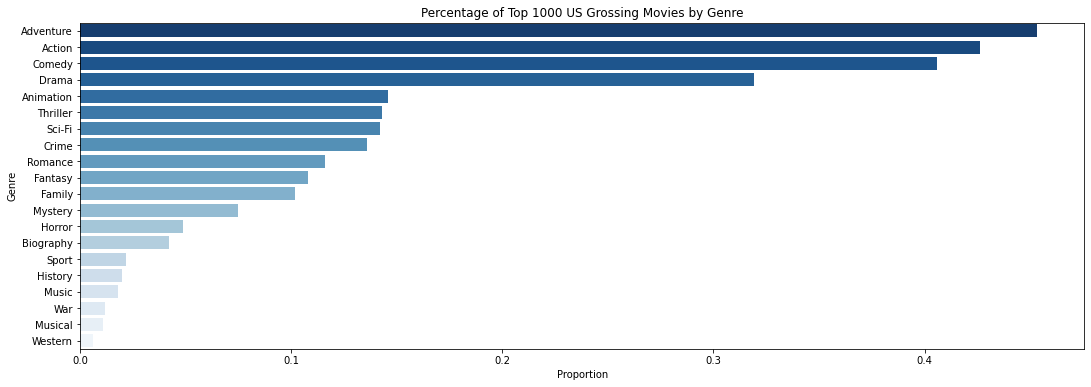

In [7]:
print(reg1)

# Maybe is genres that affect the revenue, so that is the distribution of genres

genre_props = (
    df[['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']]
    .mean()
    .reset_index()
    .rename(columns = {"index": "Genre", 0: "Proportion"})
    .sort_values("Proportion", ascending = False)
)

plt.figure(figsize=(18,6))
plot6 = sns.barplot(data=genre_props,
            x = "Proportion",
            y = "Genre",
           orient = "h",
           palette = "Blues_r").set(title="Percentage of Top 1000 US Grossing Movies by Genre")

   Unnamed: 0    coef  std err       t  P>|t|  [0.025  0.975]
0       const  7.2568    0.130  55.877  0.000   7.002   7.512
1      Action -0.2885    0.066  -4.364  0.000  -0.418  -0.159
2   Adventure -0.0635    0.068  -0.931  0.352  -0.197   0.070
3   Animation  0.2121    0.088   2.401  0.016   0.039   0.385
4   Biography  0.1049    0.087   1.212  0.226  -0.065   0.275
5      Comedy -0.5478    0.071  -7.683  0.000  -0.688  -0.408
6       Crime -0.0143    0.072  -0.199  0.842  -0.155   0.126
7       Drama  0.2167    0.068   3.183  0.001   0.083   0.350
8      Family -0.4554    0.089  -5.143  0.000  -0.629  -0.282
9     Fantasy -0.1377    0.085  -1.628  0.104  -0.304   0.028
10    History -0.0114    0.120  -0.095  0.924  -0.247   0.224
11     Horror -0.8923    0.094  -9.457  0.000  -1.077  -0.707
12      Music -0.3862    0.110  -3.520  0.000  -0.601  -0.171
13    Musical  0.4464    0.199   2.244  0.025   0.056   0.837
14    Mystery -0.1651    0.082  -2.002  0.045  -0.327  -0.003
15    Ro

[Text(0.5, 0, 'Release Year'),
 Text(0, 0.5, 'Domestic Gross Revenue (in Millions of $)'),
 Text(0.5, 1.0, 'Relation between release year and domestic revenue with Adventure movies highlighted')]

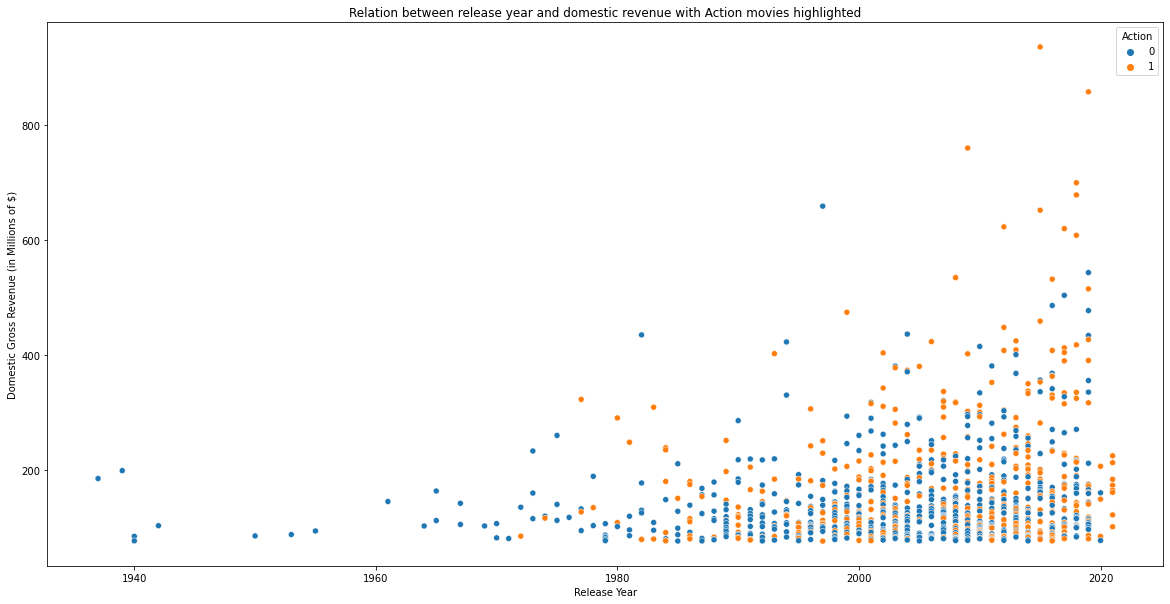

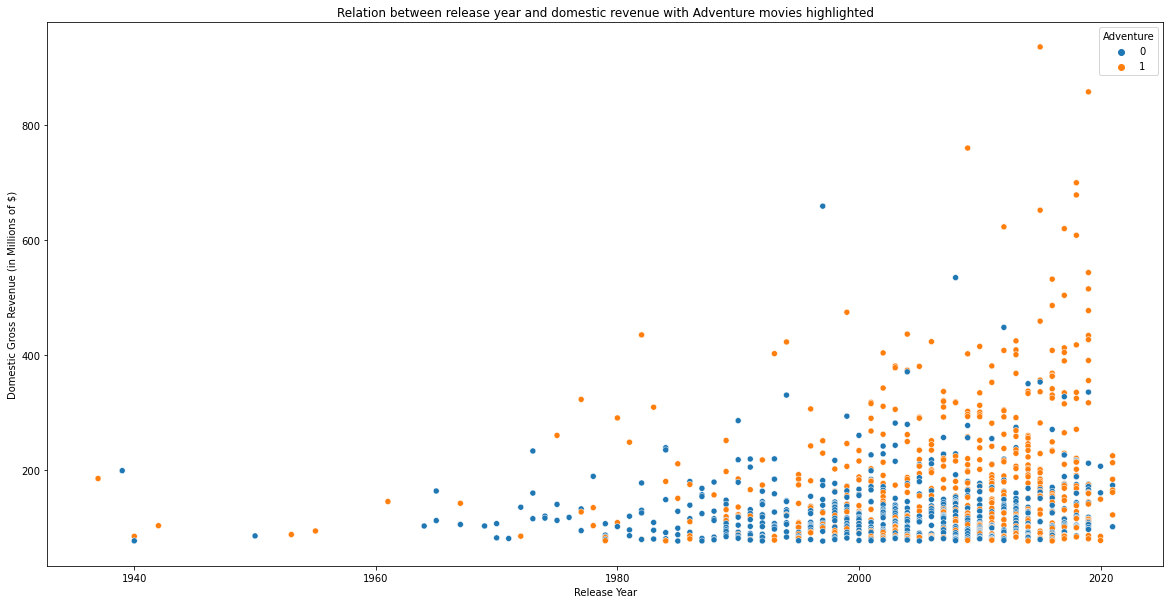

In [8]:
# The proportion shows that actually there is a higher than 100% percentage of movies accounted for.
# The problem is that IMDB has on average three genres for movies, if we look at each genre separated, we would be counting
# them more than once. We can clearly see that in the following chart, where from the top 10 grossing movies, 9 are both
# adventure and action. If we go through the data, majority of Action movies are also Adventure and majority of movies receive
# the Adventure genre, but never alone. That creates a bias in the regression as well, where it made Action genre not significant
# while maintaining Adventure significant when evaluating revenue. And it makes Adventure not significant when checking scores.
# Show "metascore_ols_regression.csv" and "imdb_ols_regression.csv". 



# Regression of the IMDB Ratings on genres
reg2 = pd.read_csv("../quantitative analysis/imdb_ols_regression.csv")
print(reg2)



# Regression of the Metascore on genres
reg3 = pd.read_csv("../quantitative analysis/metascore_ols_regression.csv")
print(reg3)


# Can change chart to show that colinearity if needed any variable for X would work, cannot change Y

plt.figure(figsize=(20, 10))
plot7 = sns.scatterplot(data=df, x="ReleaseYear", y="GrossRevenue", hue="Action")
plot7.set(xlabel="Release Year", ylabel="Domestic Gross Revenue (in Millions of $)",
         title="Relation between release year and domestic revenue with Action movies highlighted")

plt.figure(figsize=(20, 10))
plot8 = sns.scatterplot(data=df, x="ReleaseYear", y="GrossRevenue", hue="Adventure")
plot8.set(xlabel="Release Year", ylabel="Domestic Gross Revenue (in Millions of $)",
         title="Relation between release year and domestic revenue with Adventure movies highlighted")

[Text(0.5, 0, 'Genre Combination'),
 Text(0, 0.5, 'Average Domestic Gross Revenue (in Millions of $)'),
 Text(0.5, 1.0, 'Relation between genres and average domestic revenue')]

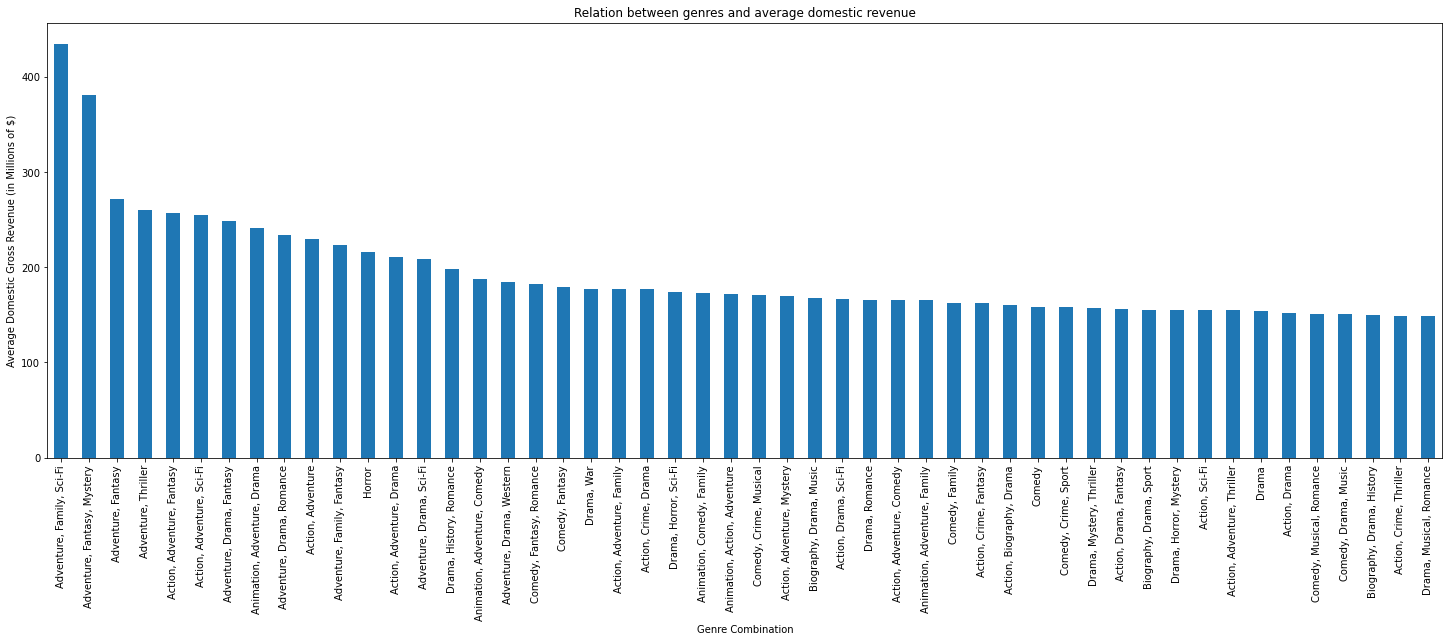

In [9]:
# Because we want to avoid counting them multiple times, we decided that was better to use all genres assigned to a movie.
# With that we choose the top 50 highest grossing genre grouppings, which can be seen in our regression as having 2-3 
# dummy variables with value 1 and the rest 0. (don't know if necessary to explain that, but that's my opinion).

plot9 = (
    df.groupby("Genres")["GrossRevenue"]
    .mean()
    .sort_values(ascending=False)[:50]
    .plot.bar(figsize=(25, 8))
)
plot9.set(xlabel="Genre Combination", ylabel="Average Domestic Gross Revenue (in Millions of $)",
         title="Relation between genres and average domestic revenue")

In [10]:
# In that we can see that even though Action is a genre in approximately 41-42%, it doesn't figure in the top 3 genre groups
# by highest grossing. This chart fits the regression, given that the best combination can't happen, "Adventure, Sci-Fi, Fantasy",
# as Sci-Fi and Fantasy are completely unrelated and Adventure is in majority of the genres groups as we have previously said.

In [11]:
# I think there is enough time, but if we need more material, we can use the regression made in "decade_analysis.csv" 
# and with it we can use the charts bellow to vizualize the values:

   Unnamed: 0 Runtime Runtime.1 Runtime.2 Runtime.3 Runtime.4 Runtime.5  \
0         NaN   count      mean       std       min       25%       50%   
1      Decade     NaN       NaN       NaN       NaN       NaN       NaN   
2        1930     2.0     160.5     109.6      83.0    121.75     160.5   
3        1940     3.0     94.33     28.04      70.0      79.0      88.0   
4        1950     7.0    119.86     51.72      74.0      76.5     118.0   
5        1960    15.0    150.93     44.16      78.0     115.0     158.0   
6        1970    44.0    128.84     26.95      86.0     115.0     122.5   
7        1980   113.0    112.11     18.42      74.0      98.0     109.0   
8        1990   266.0    118.02     23.02      75.0     103.0     116.0   
9        2000   502.0    113.68     20.75      78.0      98.0     110.0   
10       2010   534.0    115.75     18.55      81.0     102.0     114.0   
11       2020    16.0    120.44     20.65      97.0     102.5     116.0   

   Runtime.6 Runtime.7 I

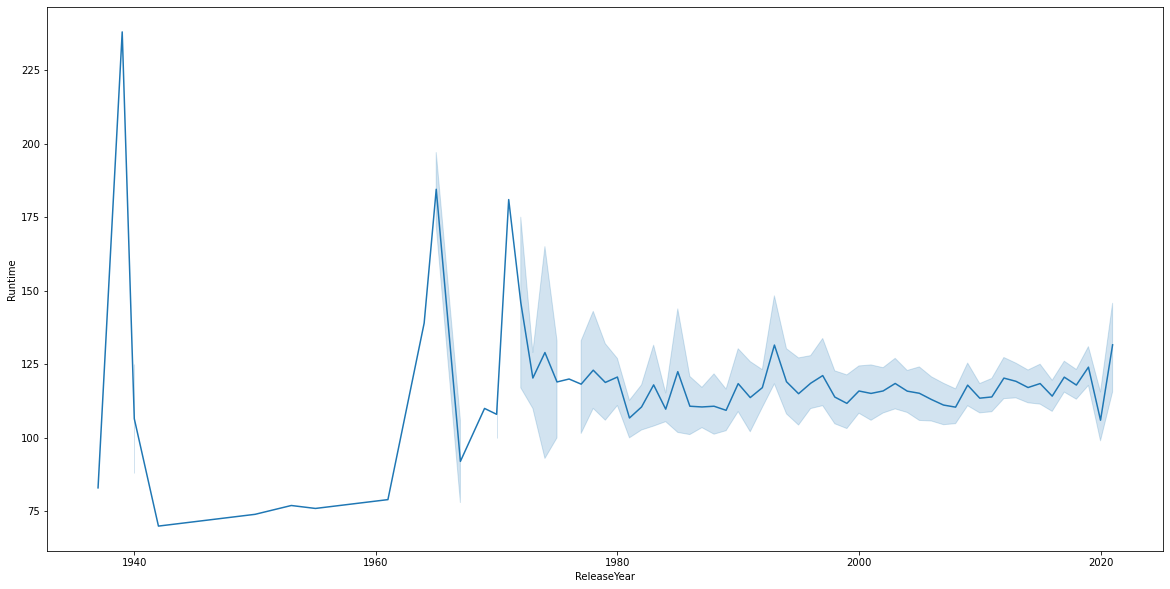

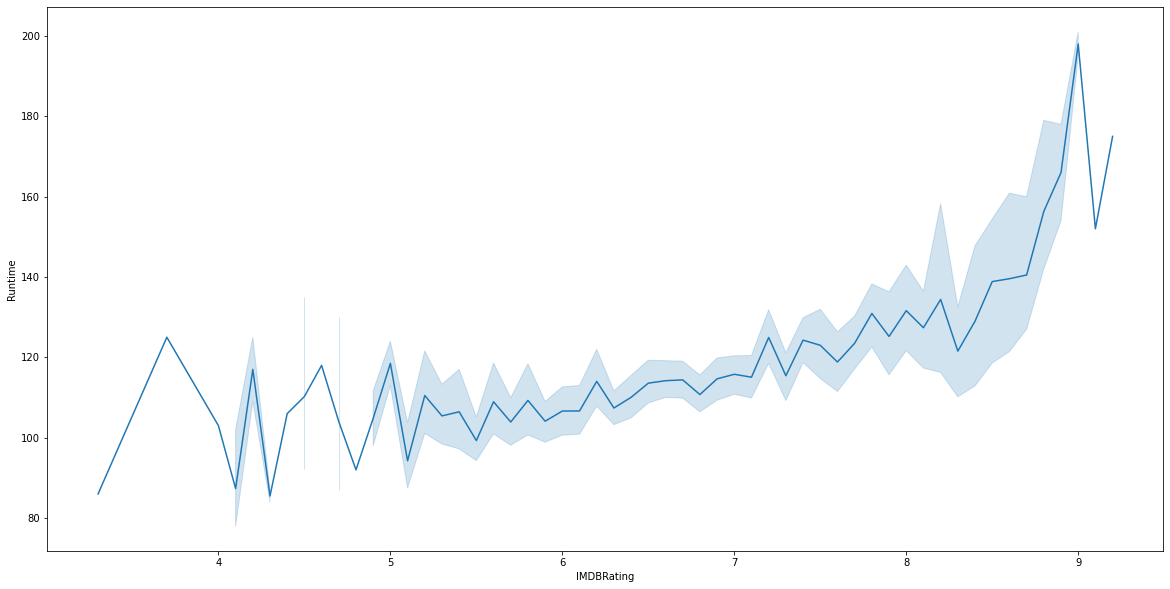

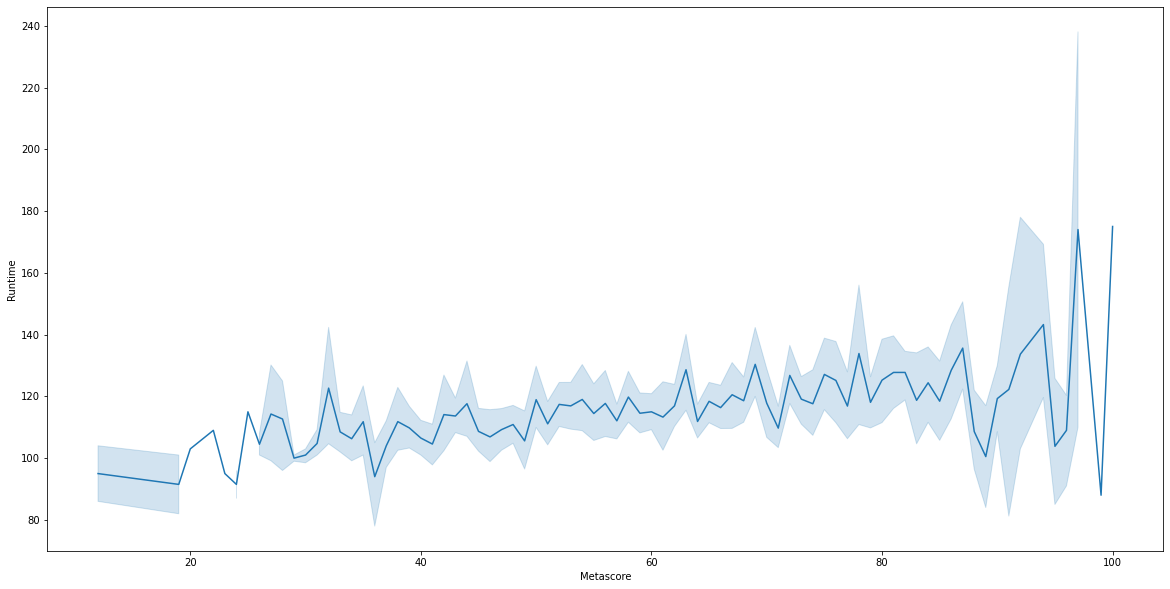

In [12]:
reg4 = pd.read_csv("../quantitative analysis/decade_analysis.csv")
print(reg4)

plt.figure(figsize=(20, 10))
plot10 = sns.lineplot(data=df, x="ReleaseYear", y="Runtime")

plt.figure(figsize=(20, 10))
plot11 = sns.lineplot(data=df, x="IMDBRating", y="Runtime")

plt.figure(figsize=(20, 10))
plot12 = sns.lineplot(data=df, x="Metascore", y="Runtime")